In [23]:
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set()

from IPython.display import display

from sklearn.metrics import fbeta_score, make_scorer
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('churn.txt', sep=',')
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [3]:
df.rename(columns={'Churn?':'Churn' , 'Int\'l Plan':'Intl_Plan'}, inplace=True) 
df.columns = df.columns.str.replace(" ", "_")
df.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.drop(['Area_Code','Phone'], inplace=True, axis=1) # Overwrites the data frame
df['Churn'] = df['Churn'].map({'True.' : 1, 'False.' : 0})
df['Intl_Plan'] = df['Intl_Plan'].map({'yes' : 1, 'no' : 0})
df['VMail_Plan'] = df['VMail_Plan'].map({'yes' : 1, 'no' : 0})
df.Intl_Plan = df.Intl_Plan.astype('category')
df.VMail_Plan = df.VMail_Plan.astype('category')
df.head(3)

,State,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


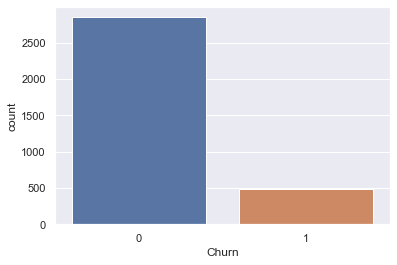

In [6]:
sns.countplot(df['Churn'],label="Count"); 

In [7]:
print(df.groupby('Churn').size()) 

Churn
0    2850
1     483
dtype: int64


In [15]:
df.drop(['Day_Charge','Eve_Charge','Night_Charge', 'Intl_Charge'], inplace=True, axis=1)
df.drop(['State'], inplace=True, axis=1)

In [8]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb

## Base Model:

In [16]:
seed = 40 
train, test = model_selection.train_test_split(df, test_size=0.30, random_state=seed, stratify=df['Churn'])

y_train = train['Churn']
X_train = train.drop('Churn', axis=1)
y_test = test['Churn']
X_test = test.drop('Churn', axis=1)

num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])

num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') 


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',   LogisticRegression(random_state=seed))
                          ]
                   )

params = [{'classifier__C'      : np.arange(0.1, 2.0, 0.05), 
           'classifier__penalty': ['l1'], 
           'classifier__solver' : ['liblinear', 'saga']},
          
          {'classifier__C'      : np.arange(0.1, 2.0, 0.05), 
           'classifier__penalty': ['l2'], 
           'classifier__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
         ]

kfold = StratifiedKFold(n_splits = 10, random_state = seed, shuffle=True) 
grid = GridSearchCV(pipeline, param_grid = params, cv = kfold, verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 266 candidates, totalling 2660 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.866266609515645
Test accuracy    : 0.853


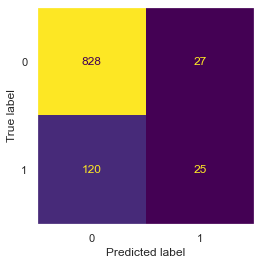

In [19]:
print('\nTraining accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))

plot_confusion_matrix(grid, X_test, y_test, colorbar=False)
plt.grid(False)

In [20]:
def print_results(headline, true_value, pred, probs):
    scores=[]
    CM = confusion_matrix(true_value, pred)
    scores.append(headline)
    scores.append(accuracy_score(true_value, pred))
    scores.append(int(CM[1,1]))
    scores.append(int(CM[0,1]))
    scores.append(int(CM[0][0]))
    scores.append(int(CM[1][0]))
    scores.append(precision_score(true_value, pred))
    scores.append(recall_score(true_value, pred))
    scores.append(roc_auc_score(true_value, probs))
    p, r, _ = precision_recall_curve(true_value, probs)
    scores.append(auc(r,p))
    scores.append(f1_score(true_value, pred))
    scores.append(fbeta_score(true_value, pred, beta=2)) 
    return scores

score_names = ['method','accuracy','TP','FP','TN','FN','precision','recall','roc_auc','pr_auc','f1', 'f2']
dfAcc = pd.DataFrame(data=np.zeros(shape=(0,12)), columns = score_names)

In [21]:
pred_probs = grid.predict_proba(X_test)[:,1]
scores = print_results('Baseline model', y_test, grid.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

# Dealing with imbalanced data

# 1. Over/Under Sampling

## 1.a. Random Oversampling

In [24]:
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_attrs)],
                                 remainder    = 'passthrough' # process num features and let all others pass through
                                )

ovsmp_pipe = pipe_imb([('preprocessor', preprocessor),
                       ('sampler'     , RandomOverSampler(random_state=seed)),
                       ('clf'         , LogisticRegression(random_state=seed))
                      ]
                     )

params = [{'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0], # (Minority_class_size / Majortiy_class_size) after sampling
           'clf__C'                    : np.arange(0.1, 1, 0.05), 
           'clf__solver'               : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }]

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
grid1 = GridSearchCV(estimator=ovsmp_pipe,
                     param_grid=params, 
                     cv=kfold,
                     scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)

grid1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.639280505590666
Test accuracy    : 0.58759521218716


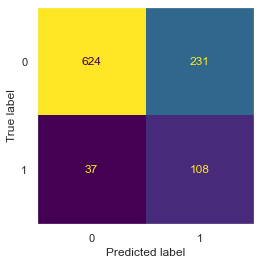

In [25]:
print('\nTraining accuracy:', grid1.score(X_train, y_train))
print('Test accuracy    :', grid1.score(X_test, y_test))

plot_confusion_matrix(grid1, X_test, y_test, colorbar=False)
plt.grid(False)

In [26]:
pred_probs = grid1.predict_proba(X_test)[:,1]
scores = print_results('Over-sampling', y_test, grid1.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595


## 1.b. Random Undersampling

In [27]:
unsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'clf__C': np.arange(0.1, 1, 0.05), 
           'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }]

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
grid2 = GridSearchCV(estimator=unsmp_pipe, param_grid=params, cv=kfold, 
                     scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)
grid2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.6304771178188899
Test accuracy    : 0.5975877192982456


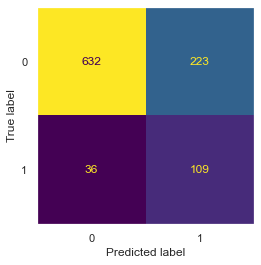

In [28]:
print('\nTraining accuracy:', grid2.score(X_train, y_train))
print('Test accuracy    :', grid2.score(X_test, y_test))

plot_confusion_matrix(grid2, X_test, y_test, colorbar=False)
plt.grid(False)

In [29]:
pred_probs = grid2.predict_proba(X_test)[:,1]
scores = print_results('Under-sampling', y_test, grid2.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588


## 1.c. Oversampling via SMOTE

In [30]:
SMOTE_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', SMOTE(random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__k_neighbors': [3, 5, 7, 9, 11],
           'clf__C': np.arange(0.1, 1, 0.05), 
           'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }]

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
grid3 = GridSearchCV(estimator=SMOTE_pipe, param_grid=params, cv=kfold, 
                     scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)
grid3.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.6298828125
Test accuracy    : 0.6037321624588365


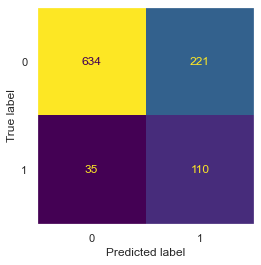

In [31]:
print('\nTraining accuracy:', grid3.score(X_train, y_train))
print('Test accuracy    :', grid3.score(X_test, y_test))

plot_confusion_matrix(grid3, X_test, y_test, colorbar=False)
plt.grid(False)

In [32]:
pred_probs = grid3.predict_proba(X_test)[:,1]
scores = print_results('SMOTE', y_test, grid3.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588
SMOTE,0.744000,110,221,634,35,0.332326,0.758621,0.813591,0.412061,0.462185,0.603732


## 1.d. Oversampling via SMOTEENN

In [33]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [34]:
SMOTEENN_pipe = pipe_imb([('preprocessor' , preprocessor),
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'clf__C': np.arange(0.1, 1, 0.05), 
           'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }]

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
grid4 = GridSearchCV(estimator=SMOTEENN_pipe, param_grid=params, cv=kfold, 
                     scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)
grid4.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.639367816091954
Test accuracy    : 0.6073752711496746


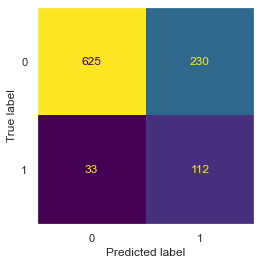

In [35]:
print('\nTraining accuracy:', grid4.score(X_train, y_train))
print('Test accuracy    :', grid4.score(X_test, y_test))

plot_confusion_matrix(grid4, X_test, y_test, colorbar=False)
plt.grid(False)

In [36]:
pred_probs = grid4.predict_proba(X_test)[:,1]
scores = print_results('SMOTEENN', y_test, grid4.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588
SMOTE,0.744000,110,221,634,35,0.332326,0.758621,0.813591,0.412061,0.462185,0.603732
SMOTEENN,0.737000,112,230,625,33,0.327485,0.772414,0.812688,0.401653,0.459959,0.607375


## 1.e. Oversampling via SMOTEENN optimized on PR-AUC

In [37]:
from sklearn.metrics import average_precision_score

grid5 = GridSearchCV(estimator=SMOTEENN_pipe, param_grid=params, cv=kfold, 
                     scoring='average_precision', n_jobs=-1)

grid5.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.46915121967995466
Test accuracy    : 0.41582483653201785


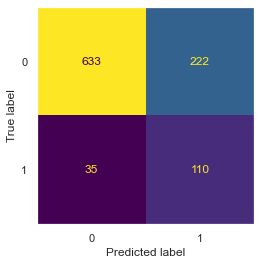

In [38]:
print('\nTraining accuracy:', grid5.score(X_train, y_train))
print('Test accuracy    :', grid5.score(X_test, y_test))

plot_confusion_matrix(grid5, X_test, y_test, colorbar=False)
plt.grid(False)

In [39]:
pred_probs = grid5.predict_proba(X_test)[:,1]
scores = print_results('SMOTEENN w/ PR-AUC', y_test, grid5.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588
SMOTE,0.744000,110,221,634,35,0.332326,0.758621,0.813591,0.412061,0.462185,0.603732
SMOTEENN,0.737000,112,230,625,33,0.327485,0.772414,0.812688,0.401653,0.459959,0.607375
SMOTEENN w/ PR-AUC,0.743000,110,222,633,35,0.331325,0.758621,0.812930,0.412263,0.461216,0.603070


# 2. Using a model that can handle imbalanced classes

## DecisionTree, RandomForestClassifier, ExtraTrees, GBM, XGBoost 

In [40]:
from sklearn.ensemble import RandomForestClassifier as RF

clf = RF(criterion = 'gini', n_estimators = 300, max_depth = 13, min_samples_leaf = 1, 
         min_samples_split = 3, max_features = 7, random_state = seed)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print( 'RF Training accuracy       :',(accuracy_score(y_train, clf.predict(X_train))) )
print( 'RF Classification accuracy :',(accuracy_score(y_test, predictions)))

RF Training accuracy       : 0.9849978568366909
RF Classification accuracy : 0.963


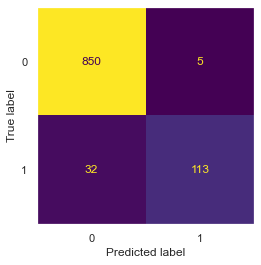

In [41]:
plot_confusion_matrix(clf, X_test, y_test, colorbar=False)
plt.grid(False)

In [42]:
print('\n',classification_report(y_test, clf.predict(X_test)))


               precision    recall  f1-score   support

           0       0.96      0.99      0.98       855
           1       0.96      0.78      0.86       145

    accuracy                           0.96      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.96      0.96      0.96      1000



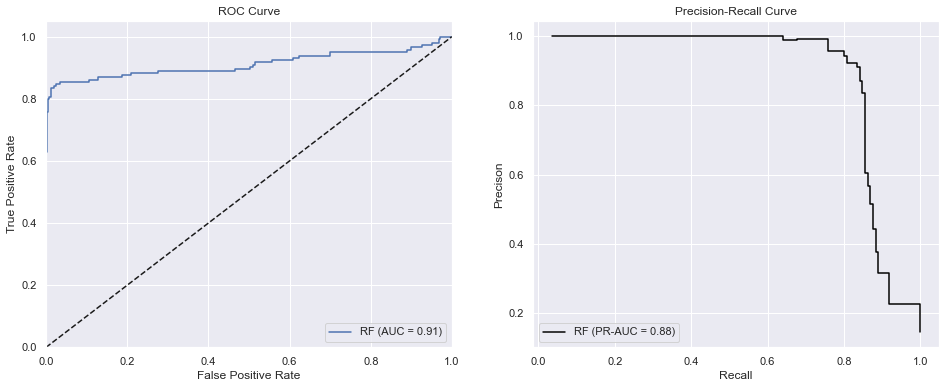

In [43]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

pred_prob = clf.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])
pr_auc = auc(recall, precision)

Xt = [] ; Yp = [] ; Yr = [] 
for thresh in np.linspace(0.0, 0.98, 40):
    y_pred = binarize(pred_prob, threshold=thresh)[:,1]
    Xt.append(thresh)
    Yp.append(precision_score(y_test, y_pred))
    Yr.append(recall_score(y_test, y_pred))

plt.figure(figsize=(16,6))
plt.subplot(121)    
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) ; plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') ; plt.ylabel('True Positive Rate')
plt.title('ROC Curve') ; plt.legend(loc="lower right")
plt.subplot(122)
plt.step(Yr, Yp, color='black', label='RF (PR-AUC = %0.2f)' % pr_auc)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall') ; plt.ylabel('Precison')
plt.legend(loc="lower left")
plt.show()

In [44]:
pred_probs = clf.predict_proba(X_test)[:,1]
scores = print_results('Random Forest', y_test, clf.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588
SMOTE,0.744000,110,221,634,35,0.332326,0.758621,0.813591,0.412061,0.462185,0.603732
SMOTEENN,0.737000,112,230,625,33,0.327485,0.772414,0.812688,0.401653,0.459959,0.607375
SMOTEENN w/ PR-AUC,0.743000,110,222,633,35,0.331325,0.758621,0.812930,0.412263,0.461216,0.603070
Random Forest,0.963000,113,5,850,32,0.957627,0.779310,0.911329,0.882725,0.859316,0.809456


In [45]:
from lazypredict.Supervised import LazyClassifier

In [51]:
clf_lazy= LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
modeller,tahmin=clf_lazy.fit(X_train,X_test,y_train,y_test)

 14%|███████████▍                                                                       | 4/29 [00:01<00:07,  3.26it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:03<00:00, 10.85it/s]

NuSVC model failed to execute
specified nu is infeasible


 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:04<00:00,  7.27it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.74it/s]


In [52]:
sıra = modeller.sort_values(by="Accuracy",ascending=False)
sıra

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.93,0.79,0.79,0.92,0.66
BaggingClassifier,0.93,0.77,0.77,0.92,0.24
XGBClassifier,0.93,0.78,0.78,0.92,1.11
RandomForestClassifier,0.92,0.76,0.76,0.92,0.84
ExtraTreesClassifier,0.91,0.71,0.71,0.90,0.47
SVC,0.90,0.68,0.68,0.88,0.31
KNeighborsClassifier,0.88,0.60,0.60,0.85,0.12
QuadraticDiscriminantAnalysis,0.87,0.64,0.64,0.85,0.08
AdaBoostClassifier,0.87,0.63,0.63,0.85,0.30


In [54]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])

num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') 


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',   LGBMClassifier())
                          ]
                   )

params = [{"classifier__max_depth":[3,5,7],
           "classifier__subsample":[0.6,0.8,1.0],
           "classifier__n_estimators":[200,500,1000],
           "classifier__learning_rate":[0.001,0.01,0.1]}
         ]

kfold = StratifiedKFold(n_splits = 10, random_state = seed, shuffle=True) 
gridn = GridSearchCV(pipeline, param_grid = params, cv = kfold, verbose = 1, n_jobs = -1)
gridn.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.9957136733819117
Test accuracy    : 0.96


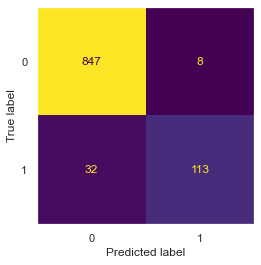

In [56]:
print('\nTraining accuracy:', gridn.score(X_train, y_train))
print('Test accuracy    :', gridn.score(X_test, y_test))

plot_confusion_matrix(gridn, X_test, y_test, colorbar=False)
plt.grid(False)

In [57]:
pred_probs = gridn.predict_proba(X_test)[:,1]
scores = print_results('Light GBM', y_test, gridn.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588
SMOTE,0.744000,110,221,634,35,0.332326,0.758621,0.813591,0.412061,0.462185,0.603732
SMOTEENN,0.737000,112,230,625,33,0.327485,0.772414,0.812688,0.401653,0.459959,0.607375
SMOTEENN w/ PR-AUC,0.743000,110,222,633,35,0.331325,0.758621,0.812930,0.412263,0.461216,0.603070
Random Forest,0.963000,113,5,850,32,0.957627,0.779310,0.911329,0.882725,0.859316,0.809456
Light GBM,0.960000,113,8,847,32,0.933884,0.779310,0.925961,0.880831,0.849624,0.805991


In [58]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])

num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') 


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',   XGBClassifier())
                          ]
                   )

params = [{"classifier__max_depth":[3,5,7],
           "classifier__subsample":[0.6,0.8,1.0],
           "classifier__n_estimators":[200,500,1000],
           "classifier__learning_rate":[0.001,0.01,0.1]}
         ]

kfold = StratifiedKFold(n_splits = 10, random_state = seed, shuffle=True) 
gridx = GridSearchCV(pipeline, param_grid = params, cv = kfold, verbose = 1, n_jobs = -1)
gridx.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Account_Length',
                                                                          'VMail_Message',
                                                                          'Day_Mins',
                                                                          'Day_Calls',
                                                                          'Eve_Mins',
                                                   


Training accuracy: 0.9781397342477497
Test accuracy    : 0.962


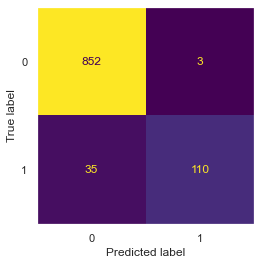

In [59]:
print('\nTraining accuracy:', gridx.score(X_train, y_train))
print('Test accuracy    :', gridx.score(X_test, y_test))

plot_confusion_matrix(gridx, X_test, y_test, colorbar=False)
plt.grid(False)

In [60]:
pred_probs = gridx.predict_proba(X_test)[:,1]
scores = print_results('XGB', y_test, gridx.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide_index()

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
Baseline model,0.853000,25,27,828,120,0.480769,0.172414,0.807445,0.412608,0.253807,0.197785
Over-sampling,0.732000,108,231,624,37,0.318584,0.744828,0.810728,0.397643,0.446281,0.587595
Under-sampling,0.741000,109,223,632,36,0.328313,0.751724,0.811664,0.396769,0.457023,0.597588
SMOTE,0.744000,110,221,634,35,0.332326,0.758621,0.813591,0.412061,0.462185,0.603732
SMOTEENN,0.737000,112,230,625,33,0.327485,0.772414,0.812688,0.401653,0.459959,0.607375
SMOTEENN w/ PR-AUC,0.743000,110,222,633,35,0.331325,0.758621,0.812930,0.412263,0.461216,0.603070
Random Forest,0.963000,113,5,850,32,0.957627,0.779310,0.911329,0.882725,0.859316,0.809456
Light GBM,0.960000,113,8,847,32,0.933884,0.779310,0.925961,0.880831,0.849624,0.805991
XGB,0.962000,110,3,852,35,0.973451,0.758621,0.915120,0.886079,0.852713,0.793651


In [62]:
# Winner Light GBM

print(gridn.best_params_)

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 1000, 'classifier__subsample': 0.6}


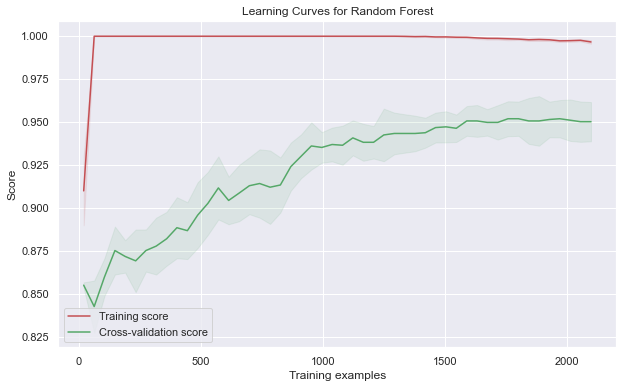

In [63]:
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

from sklearn.model_selection import learning_curve
# Ref: http://scikit-learn.org/stable/modules/learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 50)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid("on")
    return plt

title = 'Learning Curves for Random Forest'
estimator = LGBMClassifier(max_depth=7,subsample=0.6,n_estimators=1000,learning_rate=0.01)
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
plot_learning_curve(estimator, title, X_train, y_train, cv=kfold)
plt.show()

In an overfit model, there is a rather large gap in RMSE scores between the train and validation data sets. As the number of instances increases, the validation error decreases sharply at first, while the training error rises rather slowly. As far as this particular plot is concerned, we don't see any sign of overfitting. Both curves seem to come together as we add more instances to the model. There is one thing that's worth mentioning though: None of the learning curves seem to be flat in the range of instances used. So looking at the slopes of these curves, we can claim that adding more data instances will probably lead to a better model.

In [64]:
from sklearn import set_config
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account_Length',
                                                   'VMail_Message', 'Day_Mins',
                                                   'Day_Calls', 'Eve_Mins',
                                                   'Eve_Calls', 'Night_Mins',
                                                   'Night_Calls', 'Intl_Mins',
                                                   'Intl_Calls',
                                                   'CustServ_Calls'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=Non...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [65]:
import joblib
# Save pipeline to file "pipe.joblib"
joblib.dump(pipeline,"pipe.joblib")
# Load pipeline when you want to use
same_pipe = joblib.load("pipe.joblib")

# More Pipeline Samples (Not running)

In [ ]:
def trial(cat, num):
    X_train = train[cat + num]
    y_train = np.log(train.Price)
    X_test = test[cat + num]
    
    # define the transformer for numerical variables
    num_transformer = Pipeline(steps=[('scale',  StandardScaler(with_mean=False)),
                                  ('power', PolynomialFeatures())])
    
    # define the transformer for categorical variables
    cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    
    # define the preprocessor for cat and num variables
    # and let everything else pass through untouched (there are no remaining variables here though)                           
    preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cat),
                                                   ('numerical', num_transformer, num)],
                                                   remainder = 'passthrough') #let everything else pass thru
                               
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), # first, the preprocessing step 
                           ('regressor', LinearRegression())]) # then the regressor
    
    # use powers of numerical variables with varying degrees (try linear, quadratic, cubic, 4th degree)
    param_grid = [{'preprocessor__numerical__power__degree': [1,2,3,4]}] # polynomial deg applied to num vars 
    params = param_grid 
    grid = GridSearchCV(pipeline, param_grid = params, cv = 10, verbose = 1, # 10-fold cv
                        n_jobs = -1) # -1 for parallel computing (if you have multiple cores on ypur computer)
    
    tmp = grid.fit(X_train, y_train) # assigned to tmp to turn off verbosity
    print('Polynomial deegree that gives the best CV score:',list(grid.best_params_.items())[0][1])
    y_pred = grid.predict(X_test)
    print('Test RMSE:', np.sqrt(mean_squared_error(test.Price,np.exp(y_pred))))
    return grid